In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [2]:
df_planosaude = pd.read_csv("planosaude.csv", delimiter=',')
df_planosaude

,id,despmed,idade,dcron,renda,plano
0,1,206.84,57,5,57.200001,bronze
1,2,184.19,67,4,67.199997,bronze
2,3,175.68,62,4,62.000000,bronze
3,4,180.04,67,5,67.199997,bronze
4,5,218.86,68,5,68.000000,bronze
...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,esmeralda
196,197,205.35,64,4,64.000000,bronze
197,198,133.64,49,4,48.799999,esmeralda
198,199,158.73,44,2,44.000000,esmeralda


In [3]:
#Características das variáveis do dataset
df_planosaude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    int64  
 1   despmed  200 non-null    float64
 2   idade    200 non-null    int64  
 3   dcron    200 non-null    int64  
 4   renda    200 non-null    float64
 5   plano    200 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


In [4]:
#Estatísticas univariadas
df_planosaude.describe()

,id,despmed,idade,dcron,renda
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,161.183400,50.010000,2.705000,50.022000
std,57.879185,42.447084,12.547794,1.670908,12.626538
min,1.000000,88.730000,32.000000,0.000000,31.600000
25%,50.750000,126.140000,38.000000,1.000000,38.000000
50%,100.500000,155.000000,49.000000,2.000000,48.799999
75%,150.250000,197.622500,63.000000,4.000000,63.200001
max,200.000000,269.200000,68.000000,5.000000,68.000000


In [5]:
# In[ ]: Transformação da variável 'plano' para o tipo categórico

df_planosaude['plano'] = df_planosaude['plano'].astype('category')
df_planosaude['plano']

0         bronze
1         bronze
2         bronze
3         bronze
4         bronze
         ...    
195    esmeralda
196       bronze
197    esmeralda
198    esmeralda
199    esmeralda
Name: plano, Length: 200, dtype: category
Categories (3, object): ['bronze', 'esmeralda', 'ouro']

In [6]:
# In[ ]: Tabela de frequências absolutas da variável 'plano'
df_planosaude['plano'].value_counts()

bronze       72
esmeralda    66
ouro         62
Name: plano, dtype: int64

<Figure size 1500x1000 with 0 Axes>

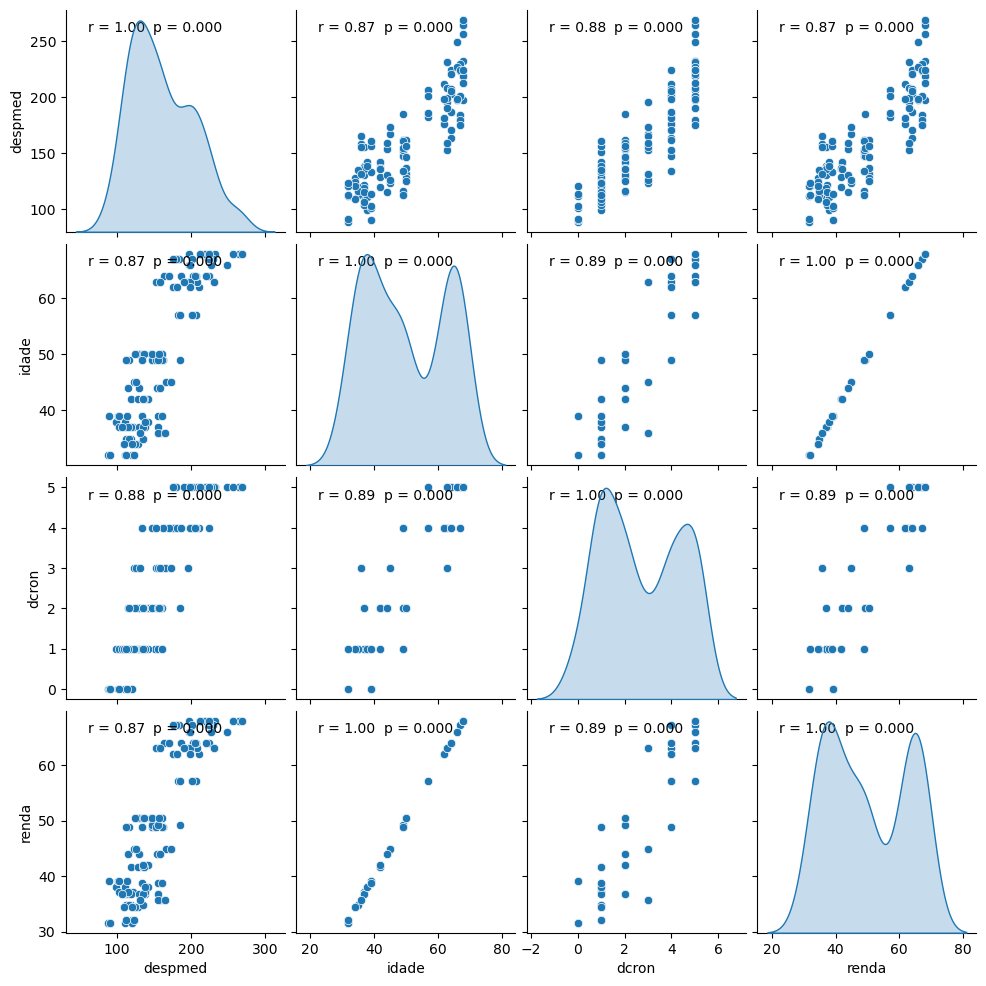

In [7]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_planosaude.loc[:,"despmed":"renda"], diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [8]:
df_planosaude_dummies = pd.get_dummies(df_planosaude, columns=['plano'],
                                        drop_first=True)

In [9]:
df_planosaude_dummies.head(10)

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro
0,1,206.84,57,5,57.200001,0,0
1,2,184.19,67,4,67.199997,0,0
2,3,175.68,62,4,62.000000,0,0
3,4,180.04,67,5,67.199997,0,0
4,5,218.86,68,5,68.000000,0,0
5,6,208.11,63,5,63.200001,0,0
6,7,220.94,64,5,64.000000,0,0
7,8,249.35,66,5,66.000000,0,0
8,9,264.93,68,5,68.000000,0,0
9,10,196.22,63,3,63.200001,0,0


In [11]:
# In[ ]: Estimação do modelo de regressão múltipla com n-1 dummies

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_planosaude_dummies.drop(columns=['id',
                                                         'despmed']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "despmed ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

modelo_planosaude = sm.OLS.from_formula(formula_dummies_modelo,
                                        df_planosaude_dummies).fit()


Fórmula utilizada:  despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro


In [12]:
#Parâmetros do modelo
modelo_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                despmed   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     262.3
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.88e-84
Time:                        20:48:22   Log-Likelihood:                -828.04
No. Observations:                 200   AIC:                             1668.
Df Residuals:                     194   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.8596     12.744     11.681      0.000     123.725     173.994
idade               8.9226      5.549      1.608      0.109      -2.021      19.866
dcron               6.7232      1.600      4.201      0.000       3.567       9.879
renda              -8.4425      5.464     -1.545      0.124     -19.219       2.334
plano_esmeralda   -35.0189      4.685     -7.474      0.000     -44.259     -25.779
plano_ouro        -58.7653      6.075     -9.673      0.000     -70.747     -46.783
==============================================================================
Omnibus:                       25.070   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.329
Skew:                           0.622   Prob(JB):                     3.20e-11
Kurtosis:                       5.062   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_planosaude = stepwise(modelo_planosaude, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.12394651280125983 

Estimating model...: 
 despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.11501748716135665 

Estimating model...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.12394651280125983}
{'atribute': 'idade', 'p-value': 0.11501748716135665}

 Model after stepwise process...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:                despmed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                   

In [14]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_planosaude.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9429167651264173,
 'statistics z': 4.609587272596232,
 'p-value': 2.017345699616522e-06}

C:\Users\carlo\AppData\Local\Temp\ipykernel_8656\1806631756.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modelo_step_planosaude.resid, fit=norm, kde=True, bins=15)


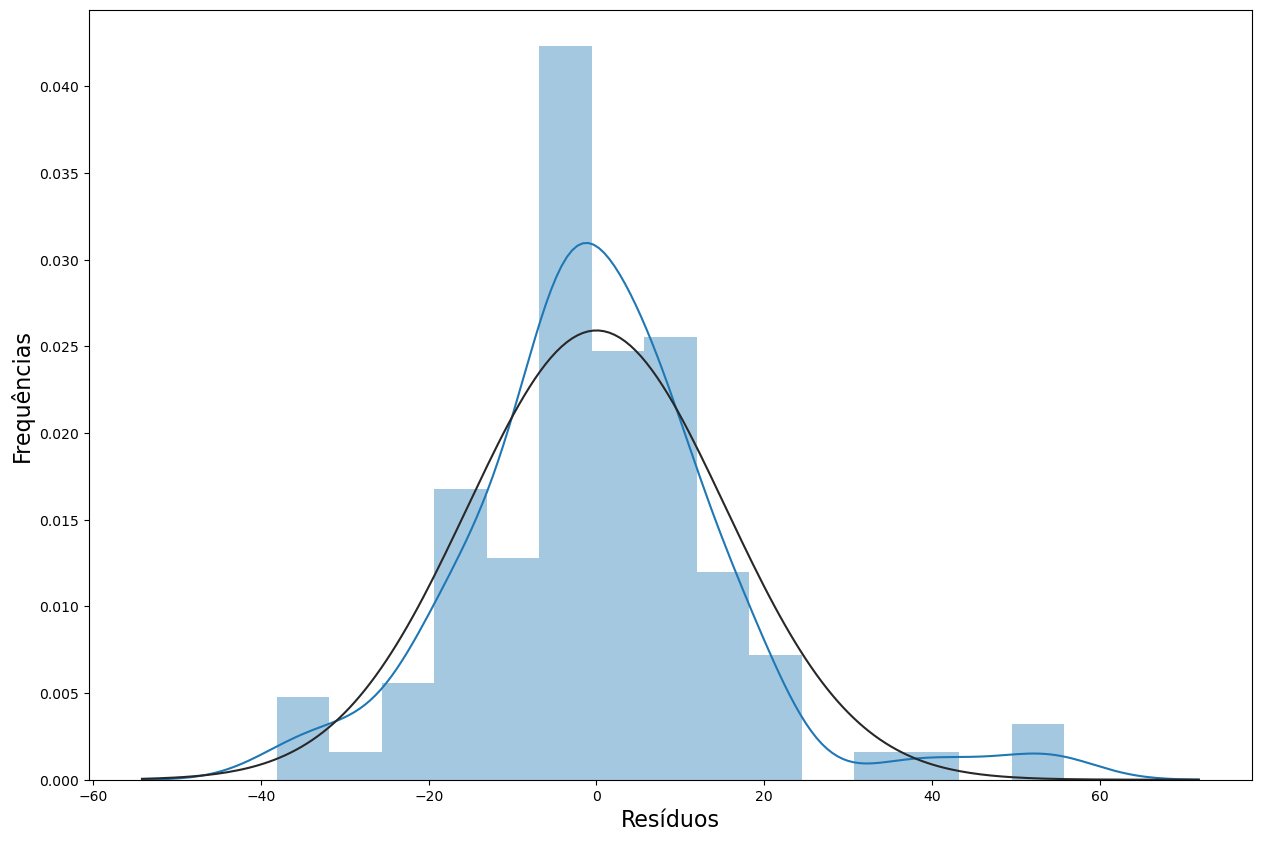

In [15]:
# In[ ]: Plotando os resíduos do 'modelo_step_planosaude',
#com curva normal teórica

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_planosaude.resid, fit=norm, kde=True, bins=15)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

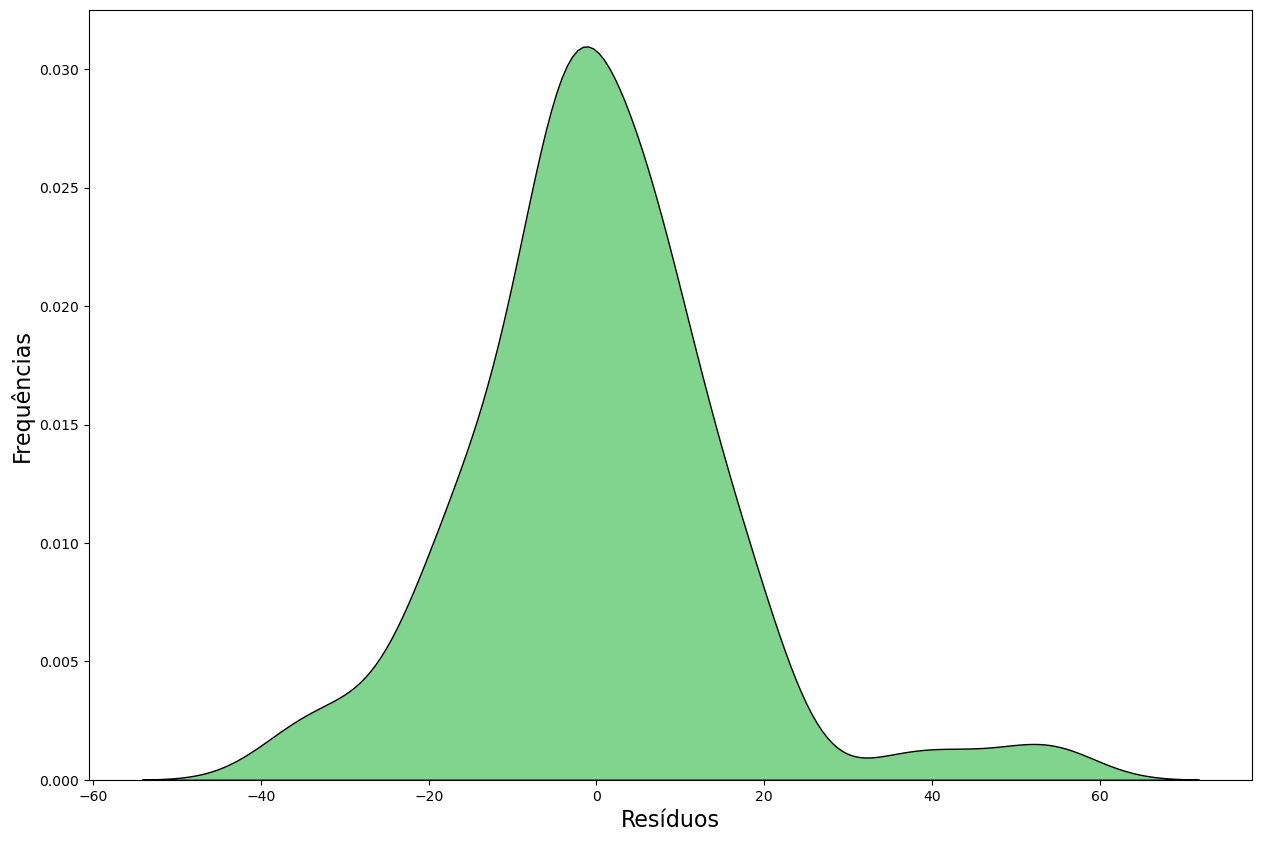

In [16]:
# In[ ]: Kernel density estimation (KDE) - forma não-paramétrica para estimar
#a função densidade de probabilidade de uma variável aleatória

plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_step_planosaude.resid, multiple="stack",
            color='#55C667FF')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [21]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade

# Criação da função 'breusch_pagan_test'

#from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value


In [23]:
from scipy import stats

In [24]:
# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_planosaude)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!




chisq: 60.801824942353875
p-value: 6.412586303735749e-15


(60.801824942353875, 6.412586303735749e-15)

In [25]:
# In[ ]: Adicionando fitted values e resíduos do 'modelo_step_planosaude'
#no dataset 'df_planosaude_dummies'

df_planosaude_dummies['fitted_step'] = modelo_step_planosaude.fittedvalues
df_planosaude_dummies['residuos_step'] = modelo_step_planosaude.resid
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515
...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648


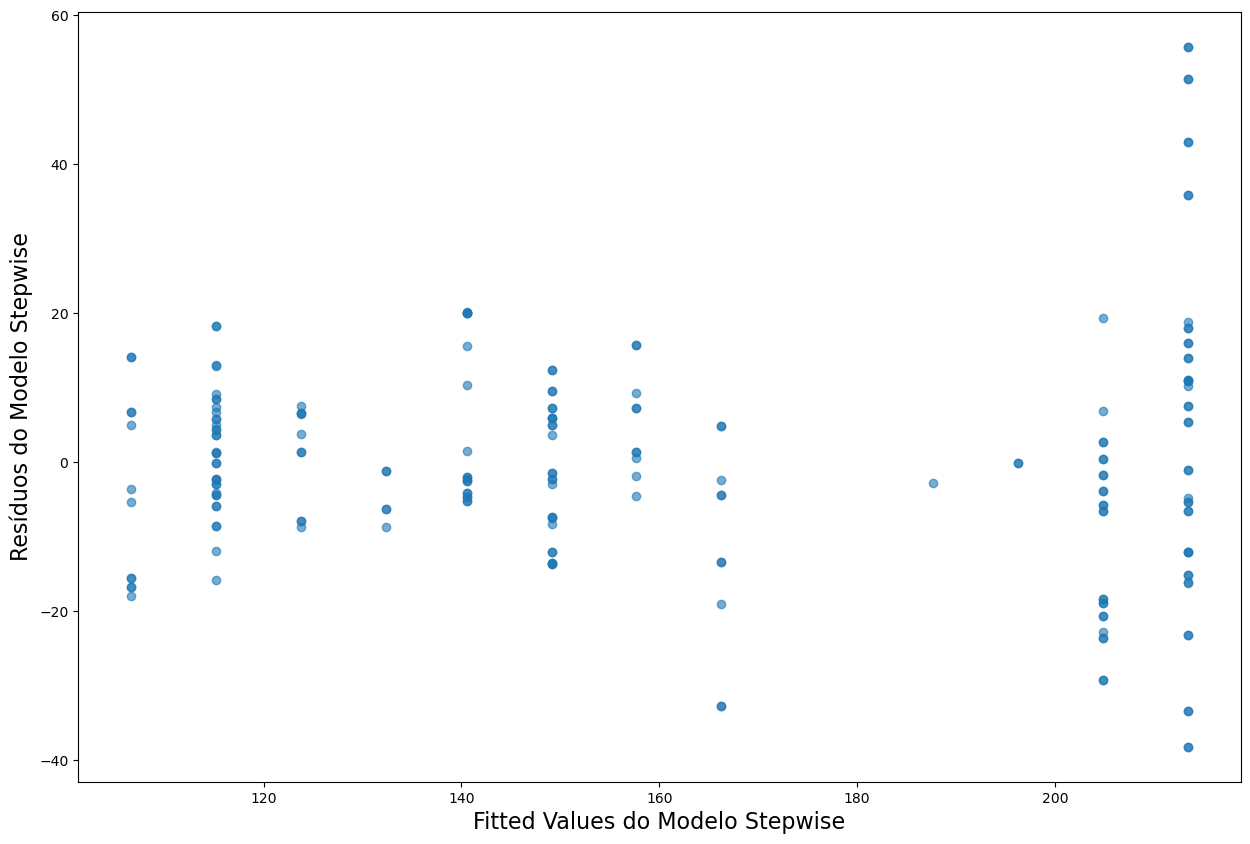

In [26]:
# In[ ]: Gráfico que relaciona resíduos e fitted values
#do 'modelo_step_planosaude'

xdata = df_planosaude_dummies['fitted_step']
ydata = df_planosaude_dummies['residuos_step']

plt.figure(figsize=(15,10))
plt.scatter(xdata, ydata, alpha=0.6)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=16)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=16)
plt.show()

In [28]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

In [29]:
#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df_planosaude_dummies['despmed'])

print("Primeiros valores: ",x[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [3.718813   3.66464869 3.64229506 3.65389877 3.74486701]
Lambda:  -0.14436741694478952


In [30]:
# In[ ]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo

df_planosaude_dummies['bc_despmed'] = x
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step,bc_despmed
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485,3.718813
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144,3.664649
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144,3.642295
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485,3.653899
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515,3.744867
...,...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307,3.594710
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856,3.715463
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034,3.510008
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648,3.593832


In [32]:
# In[ ]: Estimando um novo modelo com todas as variáveis e a
#variável dependente transformada
modelo_bc_planosaude = sm.OLS.from_formula('bc_despmed ~ idade + dcron +\
                                           renda + plano_esmeralda +\
                                               plano_ouro',
                                               df_planosaude_dummies).fit()

In [33]:
#Parâmetros do modelo
modelo_bc_planosaude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_despmed   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.5
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.80e-92
Time:                        21:12:28   Log-Likelihood:                 355.33
No. Observations:                 200   AIC:                            -698.7
Df Residuals:                     194   BIC:                            -678.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5507      0.034    103.431      0.000       3.483       3.618
idade               0.0146      0.015      0.980      0.328      -0.015       0.044
dcron               0.0231      0.004      5.360      0.000       0.015       0.032
renda              -0.0136      0.015     -0.924      0.357      -0.043       0.015
plano_esmeralda    -0.0820      0.013     -6.494      0.000      -0.107      -0.057
plano_ouro         -0.1791      0.016    -10.944      0.000      -0.211      -0.147
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.871
Skew:                          -0.246   Prob(JB):                        0.238
Kurtosis:                       3.319   Cond. No.                         964.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# In[ ]: Procedimento Stepwise

modelo_step_bc_planosaude = stepwise(modelo_bc_planosaude, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.3565250619390069 

Estimating model...: 
 bc_despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.16481169113205194 

Estimating model...: 
 bc_despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.3565250619390069}
{'atribute': 'idade', 'p-value': 0.16481169113205194}

 Model after stepwise process...: 
 bc_despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:             bc_despmed   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:         

In [35]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

#Teste de Shapiro-Francia
shapiroFrancia(modelo_step_bc_planosaude.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.986889594941709,
 'statistics z': 1.567817479053402,
 'p-value': 0.058461867248412555}

C:\Users\carlo\AppData\Local\Temp\ipykernel_8656\1690734091.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modelo_step_bc_planosaude.resid, fit=norm, kde=True, bins=15)


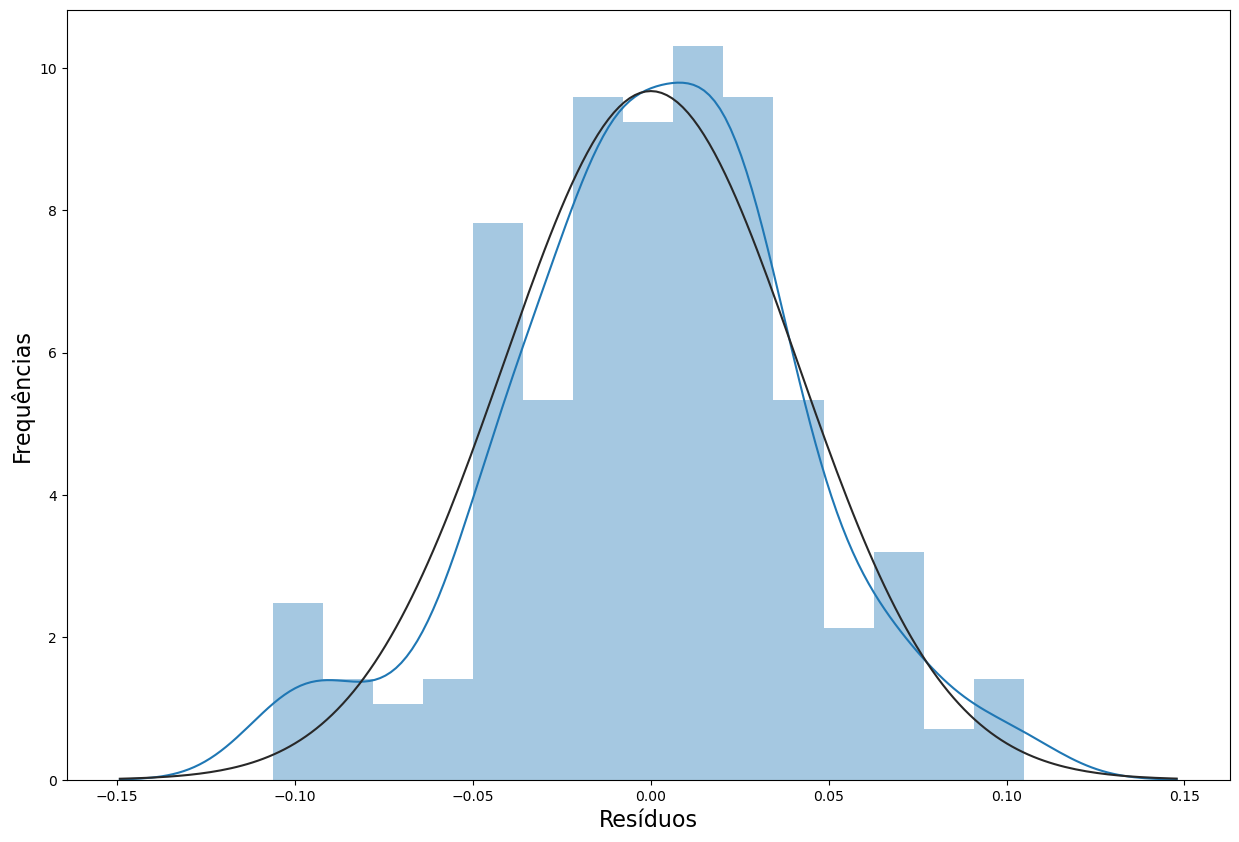

In [36]:
# In[ ]: Plotando os novos resíduos do 'modelo_step_bc_planosaude'
#com curva normal teórica

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_bc_planosaude.resid, fit=norm, kde=True, bins=15)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

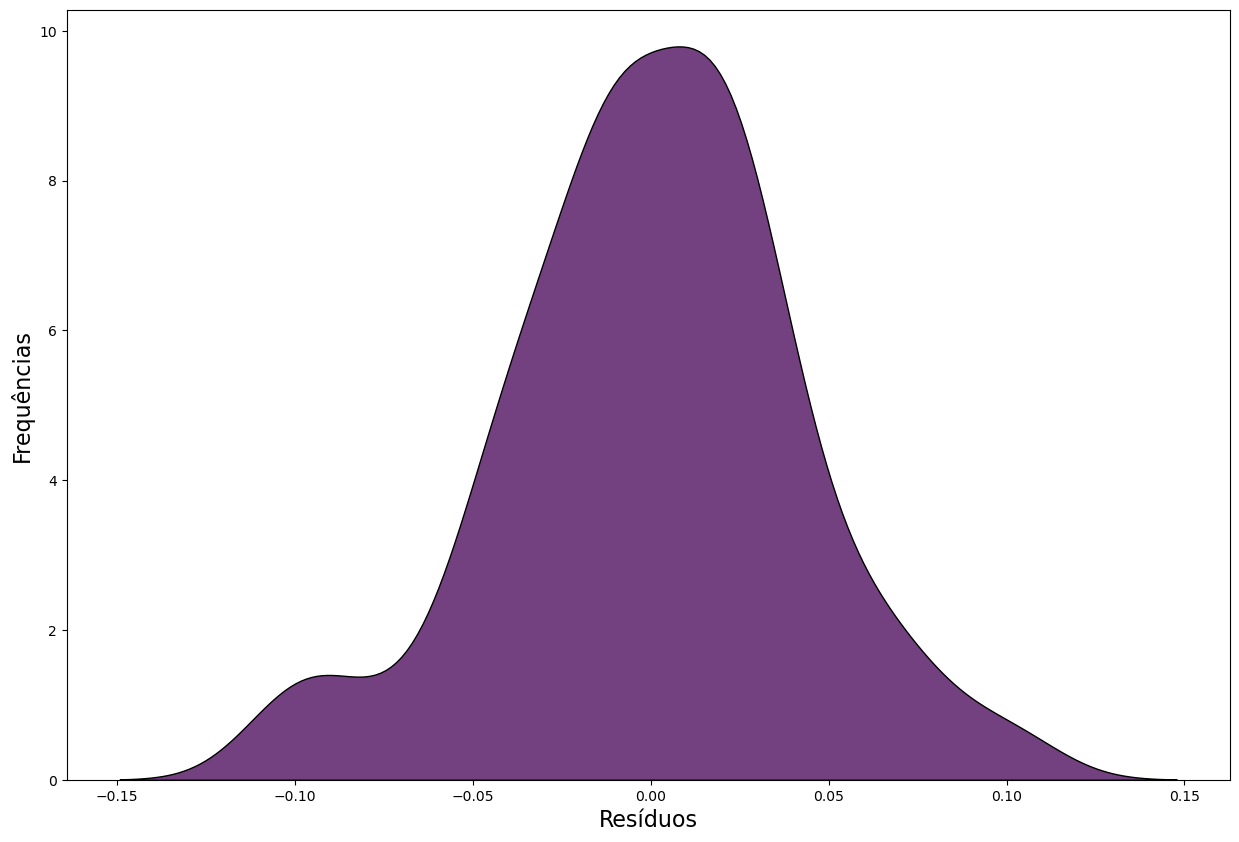

In [37]:
# In[ ]: Kernel density estimation (KDE)

plt.figure(figsize=(15,10))
sns.kdeplot(data=modelo_step_bc_planosaude.resid, multiple="stack",
            color='#440154FF')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [38]:
# In[ ]: Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
#no 'modelo_step_bc_planosaude'

breusch_pagan_test(modelo_step_bc_planosaude)

chisq: 1.0126281112242563
p-value: 0.47788750037445604


(1.0126281112242563, 0.47788750037445604)

In [39]:
# In[ ]: Adicionando fitted values e resíduos do 'modelo_step_bc_planosaude'
#no dataset 'df_planosaude_dummies'

df_planosaude_dummies['fitted_step_bc'] = modelo_step_bc_planosaude.fittedvalues
df_planosaude_dummies['residuos_step_bc'] = modelo_step_bc_planosaude.resid
df_planosaude_dummies

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,fitted_step,residuos_step,bc_despmed,fitted_step_bc,residuos_step_bc
0,1,206.84,57,5,57.200001,0,0,213.411485,-6.571485,3.718813,3.733710,-0.014897
1,2,184.19,67,4,67.199997,0,0,204.828144,-20.638144,3.664649,3.706620,-0.041972
2,3,175.68,62,4,62.000000,0,0,204.828144,-29.148144,3.642295,3.706620,-0.064325
3,4,180.04,67,5,67.199997,0,0,213.411485,-33.371485,3.653899,3.733710,-0.079812
4,5,218.86,68,5,68.000000,0,0,213.411485,5.448515,3.744867,3.733710,0.011157
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0,157.688693,1.331307,3.594710,3.589191,0.005519
196,197,205.35,64,4,64.000000,0,0,204.828144,0.521856,3.715463,3.706620,0.008843
197,198,133.64,49,4,48.799999,1,0,166.272034,-32.632034,3.510008,3.616281,-0.106274
198,199,158.73,44,2,44.000000,1,0,149.105352,9.624648,3.593832,3.562101,0.031730


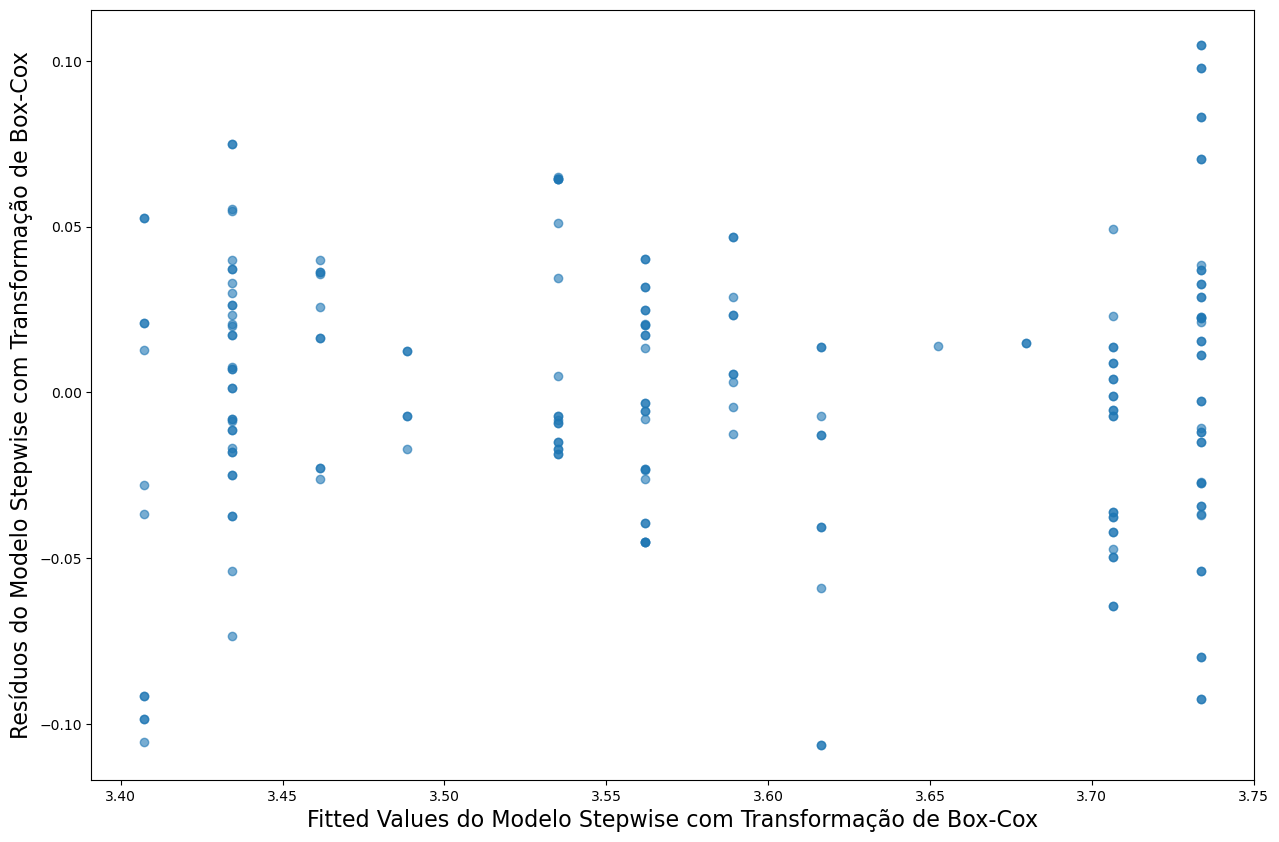

In [40]:
# In[ ]: Gráfico que relaciona resíduos e fitted values
#do 'modelo_step_bc_planosaude'

xdata = df_planosaude_dummies['fitted_step_bc']
ydata = df_planosaude_dummies['residuos_step_bc']

plt.figure(figsize=(15,10))
plt.scatter(xdata, ydata, alpha=0.6)
plt.xlabel('Fitted Values do Modelo Stepwise com Transformação de Box-Cox',
           fontsize=16)
plt.ylabel('Resíduos do Modelo Stepwise com Transformação de Box-Cox',
           fontsize=16)
plt.show()